In [ ]:
import os
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import shutil

SRC_PATH = "/kaggle/input/student-dataset/data"
DST_PATH = "/kaggle/working/dataset"

if not os.path.exists(DST_PATH):
    shutil.copytree(SRC_PATH, DST_PATH)

print("Dataset ready at:", DST_PATH)


Dataset ready at: /kaggle/working/dataset


In [ ]:
IMG_SIZE = (160, 160)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    DST_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DST_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

print("Classes:", class_names)


Found 1070 files belonging to 62 classes.
Using 856 files for training.
Found 1070 files belonging to 62 classes.
Using 214 files for validation.
Classes: ['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46258-1', '22-46293-1', '22-46473-1', '22-46590-1', '22-46666-1', '22-46679-1', '22-46887-1', '22-46931-1', '22-46983-1', '22-47180-1_', '22-47813-2', '22-47892-2', '22-47898-2', '22-47968-2', '22-48021-2', '22-48023-2_', '22-48055-2', '22-48064-2', '22-48091-2', '22-48133-2_', '22-48205-2', '22-48434-3', '22-48541-3', '22-48569-3', '22-48582-3', '22-48833-3', '22-49037-3', '22-49068-3', '22-49167-3', '22-49196-3', '22-49338-3', '22-49355-3', '22-49370-3', '22-49421-3', '22-49450-3', '22-49451-3', '22-49453-3', '22-49507-3', '22-49538-3', '22-49575-3', '22-49609-3', '22-49643-3', '22-49745-3', '22-49783-3', '22-49791-3', '22-49800-3', '22-49824-3', '22-49843-3', '22-49852-3', '22-49861-3', '22-49862-3', '23-50066-1', '23-50158-1', '23-50254-1', '23-50277-1', '23-50279-1', '

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(160,160,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,409,790 (20.64 MB)

 Trainable params: 5,409,790 (20.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)


Epoch 1/25


I0000 00:00:1767376302.318041     263 service.cc:152] XLA service 0x7963ec02cb50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767376302.318102     263 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767376302.318108     263 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767376303.017700     263 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-02 17:51:45.259889: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-02 17:51:45.405473: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 7/54 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0013 - loss: 4.4783    

I0000 00:00:1767376307.536932     263 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.0165 - loss: 4.2276 - val_accuracy: 0.0467 - val_loss: 4.0502
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.0696 - loss: 3.9205 - val_accuracy: 0.2944 - val_loss: 3.1212
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.3041 - loss: 2.8921 - val_accuracy: 0.5327 - val_loss: 2.1991
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.5633 - loss: 1.7495 - val_accuracy: 0.6168 - val_loss: 1.7415
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.6501 - loss: 1.2899 - val_accuracy: 0.6729 - val_loss: 1.5199
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.7038 - loss: 1.0482 - val_accuracy: 0.7056 - val_loss: 1.4331
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.8012 - loss: 0.6970 - val_accuracy: 0.7056 - val_loss: 1.4614
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.8195 - loss: 0.6266 - val_accuracy: 0.738

In [ ]:
model.save("student_attendance_model.keras")

with open("class_labels.json", "w") as f:
    json.dump(class_names, f)

print("Model & labels saved")


Model & labels saved


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


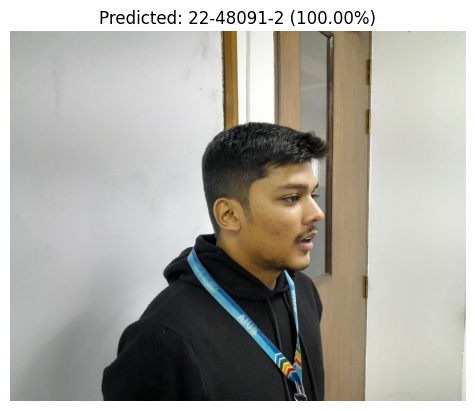

In [ ]:
import random
import cv2

labels = json.load(open("class_labels.json"))

student = random.choice(os.listdir(DST_PATH))
img_name = random.choice(os.listdir(os.path.join(DST_PATH, student)))
img_path = os.path.join(DST_PATH, student, img_name)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, IMG_SIZE)
img = img / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
predicted = labels[np.argmax(pred)]
confidence = np.max(pred) * 100

plt.imshow(cv2.imread(img_path)[:,:,::-1])
plt.title(f"Predicted: {predicted} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


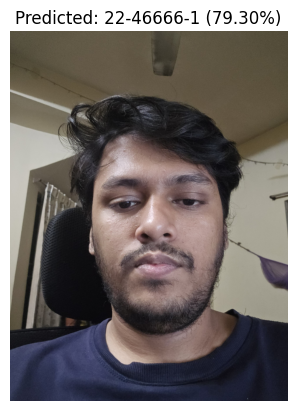

In [ ]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model = load_model("/kaggle/working/student_attendance_model.keras", compile=False)
labels = json.load(open("/kaggle/working/class_labels.json"))

image_path = "/kaggle/input/my-pic/WhatsApp Image 2026-01-03 at 12.17.49 AM.jpeg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (160,160))
img = img / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
student_id = labels[np.argmax(pred)]
confidence = np.max(pred) * 100

plt.imshow(cv2.imread(image_path)[:,:,::-1])
plt.title(f"Predicted: {student_id} ({confidence:.2f}%)")
plt.axis("off")
plt.show()
